In [110]:
import json
import operator
import pickle

import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [30]:
term_to_general_count = {}
total_count = 0
with open("term_freqs.txt", "r") as f:
    for line in f.readlines():
        term, count = line.split("\t")
        count = int(count)
        total_count += count
        term_to_general_count[term] = count
term_to_general_freq = {term: float(count)/total_count for term, count in term_to_general_count.items()}
term_to_general_freq

{'biennials': 6.384365532176389e-08,
 'verplank': 8.22088231371035e-08,
 'tsukino': 3.361704776197384e-08,
 'woode': 2.809950590836982e-08,
 'mdbc': 3.650249260806507e-08,
 'nunnery': 2.687935551263908e-07,
 'icici': 9.08002054107215e-07,
 'sowell': 6.02394847617995e-07,
 'fleeces': 5.144814473102161e-07,
 'woods': 2.490585236456102e-05,
 'clotted': 1.5265652547254937e-07,
 'spiders': 4.054055109721364e-06,
 'paizo': 4.973218071294544e-07,
 'libgstreamer': 2.258536469689437e-08,
 'woody': 7.40597453819379e-06,
 'trawling': 4.107346572518177e-07,
 'ercole': 7.479712361788626e-08,
 'comically': 2.1216436208038714e-07,
 'gae': 2.9703758832522487e-07,
 'cisapride': 1.1940504673939675e-07,
 'spidery': 5.215904896799907e-08,
 'regularize': 6.720008910266199e-08,
 'wwwlexmark': 5.269635042431305e-08,
 'caner': 1.1158527016475117e-07,
 'canes': 1.4117119674751873e-06,
 'canet': 1.363300426132872e-07,
 'ecovention': 2.569865256559975e-08,
 'moodes': 4.918348710550075e-08,
 'sprague': 1.76133028

In [8]:
with open("cleaned_prospects_to_docs.json", "r") as f:
    prospects = json.load(f)

In [9]:
with open("cleaned_curr_players_to_docs.json", "r") as f:
    curr_players = json.load(f)

In [100]:
with open("nbadraftnet_prospect_to_strengths.json", "r") as f:
    nbadraftnet_prospects_strengths = json.load(f)

In [101]:
with open("nbadraftnet_prospect_to_weaknesses.json", "r") as f:
    nbadraftnet_prospects_weaknesses = json.load(f)

In [102]:
nba_draftnet_prospects_joined = {}
for playername in nbadraftnet_prospects_strengths.keys():
    strength_text = nbadraftnet_prospects_strengths[playername]
    weakness_text = nbadraftnet_prospects_weaknesses[playername]
    nba_draftnet_prospects_joined[playername] = strength_text + " " + weakness_text

In [10]:
def get_tf_matrix(player_dict):
    text_list = []
    playername_list = []
    for player, text in player_dict.items():
        text_list.append(text)
        playername_list.append(player)

    tf_vectorizer = CountVectorizer(input=text_list, lowercase=True, stop_words="english", max_df=0.9, min_df=2)
    tf_text = tf_vectorizer.fit_transform(text_list)
    tf_feature_names = tf_vectorizer.get_feature_names()
    return tf_text, tf_feature_names

In [98]:
def get_tfidf_matrix(player_dict):
    text_list = []
    playername_list = []
    for player, text in player_dict.items():
        text_list.append(text)
        playername_list.append(player)

    tfidf_vectorizer = TfidfVectorizer(input=text_list, lowercase=True, stop_words="english", max_df=0.9, min_df=2)
    tfidf_text = tfidf_vectorizer.fit_transform(text_list)
    tfidf_feature_names = tfidf_vectorizer.get_feature_names()
    return tfidf_text, tfidf_feature_names

In [13]:
# Just experiment with prospects for now
prospects_tf, prospects_tf_features = get_tf_matrix(prospects)

In [99]:
prospects_tfidf, prospects_tfidf_features = get_tfidf_matrix(prospects)

In [127]:
curr_players_tf, curr_players_tf_features = get_tf_matrix(curr_players)

In [109]:
curr_players_tfidf, curr_players_tfidf_features = get_tfidf_matrix(curr_players)

In [105]:
nbadraftnet_prospects_strengths_tf, nbadraftnet_prospects_strengths_tf_features = get_tf_matrix(nbadraftnet_prospects_strengths)

In [106]:
nbadraftnet_prospects_strengths_tfidf, nbadraftnet_prospects_strengths_tfidf_features = get_tfidf_matrix(nbadraftnet_prospects_strengths)

In [107]:
nbadraftnet_prospects_joined_tf, nbadraftnet_prospects_joined_tf_features = get_tf_matrix(nba_draftnet_prospects_joined)

In [108]:
nbadraftnet_prospects_joined_tfidf, nbadraftnet_prospects_joined_tfidf_features = get_tfidf_matrix(nba_draftnet_prospects_joined)

In [128]:
with open("curr_players_tf.pkl", "w") as f:
    pickle.dump((curr_players_tf, curr_players_tf_features), f)

In [112]:
with open("curr_players_tfidf.pkl", "w") as f:
    pickle.dump((curr_players_tfidf, curr_players_tfidf_features), f)

In [113]:
with open("nbadraftnet_prospects_strengths_tf.pkl", "w") as f:
    pickle.dump((nbadraftnet_prospects_strengths_tf, nbadraftnet_prospects_strengths_tf_features), f)

In [114]:
with open("nbadraftnet_prospects_strengths_tfidf.pkl", "w") as f:
    pickle.dump((nbadraftnet_prospects_strengths_tfidf, nbadraftnet_prospects_strengths_tfidf_features), f)

In [115]:
with open("nbadraftnet_prospects_joined_tf.pkl", "w") as f:
    pickle.dump((nbadraftnet_prospects_joined_tf, nbadraftnet_prospects_joined_tf_features), f)

In [116]:
with open("nbadraftnet_prospects_joined_tfidf.pkl", "w") as f:
    pickle.dump((nbadraftnet_prospects_joined_tfidf, nbadraftnet_prospects_joined_tfidf_features), f)

In [83]:
token_to_ind = {}
for i, token in enumerate(prospects_tf_features):
    token_to_ind[token] = i
token_to_ind

{u'limited': 1485,
 u'todays': 2573,
 u'dynamic': 812,
 u'foul': 1071,
 u'crete': 657,
 u'oldest': 1729,
 u'aggression': 185,
 u'looking': 1516,
 u'underclassman': 2655,
 u'eligible': 841,
 u'brimah': 409,
 u'seriously': 2229,
 u'voted': 2744,
 u'sped': 2363,
 u'pride': 1914,
 u'worth': 2813,
 u'sinking': 2300,
 u'blk': 361,
 u'void': 2741,
 u'rise': 2125,
 u'handling': 1194,
 u'bringing': 411,
 u'special': 2358,
 u'school': 2182,
 u'progression': 1940,
 u'skills': 2310,
 u'pinch': 1842,
 u'tools': 2578,
 u'flashy': 1031,
 u'settings': 2236,
 u'heading': 1206,
 u'enjoy': 865,
 u'winded': 2790,
 u'force': 1062,
 u'leaders': 1442,
 u'consistent': 591,
 u'excelled': 904,
 u'disciplined': 756,
 u'likely': 1481,
 u'49': 92,
 u'blue': 373,
 u'established': 881,
 u'hide': 1228,
 u'pace': 1777,
 u'pts': 1973,
 u'selected': 2215,
 u'contributed': 612,
 u'toll': 2575,
 u'new': 1683,
 u'contributes': 613,
 u'told': 2574,
 u'niche': 1687,
 u'hero': 1223,
 u'offenses': 1717,
 u'leaning': 1448,
 u'r

In [45]:
total_wordcounts = np.array(np.sum(prospects_tf, 0))[0]
total_wordcounts


array([8189, 1065, 4652, ...,  204,  979,  415], dtype=int64)

In [29]:
out_of_vocab = 0
in_vocab = 0
for token in prospects_tf_features:
    if token not in term_to_general_freq:
        print(token)
        out_of_vocab += 1
    else:
        in_vocab += 1
print(out_of_vocab)
print(in_vocab)

10
100
11
11th
12
13
14
15
150
15th
16
17
170
175
178
18
185
186
18th
19
191
192
193
198
199
1995
1997
1998
20
200
2000
2010
2011
2012
2013
2014
2015
2016
2017
2018
202
205
207
20s
21
214
217
218
21points
22
220
222
225
226
227
23
230
233
235
24
240
242
247
25
250
26
27
28
29
2nd
30
31
32
33
34
35
36
37
38
39
3rd
3s
40
41
42
43
44
446
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
610
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
81
83
84
86
97
99th
aactop
accstrengths
acctop
angt
applebome
azubuike
bhoops
brimah
contorts
espoirs
eybl
eyblweaknesses
gabrien
givony
ibeh
improvable
interviewjonathan
kamalsky
karaicic
kohs
mussini
ncaastrengths
nickeil
on9
redshirting
rsci
sectop
shiftiness
shittu
u17
u17s
u18
u18s
u19
u19s
udkoa
verners
warney
weakside
wenyen
wingspans
171
2659


In [48]:
term_to_basketball_count = {}
total_count = 0
for index, token in enumerate(prospects_tf_features):
    count = total_wordcounts[index]
    term_to_basketball_count[token] = count
    total_count += count
    
term_to_basketball_freq = {token: float(count)/total_count for token, count in term_to_basketball_count.items()}
term_to_basketball_freq

{u'limited': 0.00068509089960047242,
 u'todays': 3.0759183247368148e-05,
 u'dynamic': 0.00017647693014651624,
 u'foul': 0.00028304662563992307,
 u'crete': 0.00029702807257054497,
 u'oldest': 8.8859862714619087e-05,
 u'aggression': 4.0701545509143712e-05,
 u'offenses': 3.479826791621447e-05,
 u'underclassman': 3.8837352585060792e-05,
 u'eligible': 0.00015721360326432609,
 u'brimah': 2.6720098578521826e-05,
 u'seriously': 2.0816820985592584e-05,
 u'voted': 7.6121211066719155e-05,
 u'sped': 3.9769449047102255e-05,
 u'pride': 7.6431909887399638e-05,
 u'worth': 0.00025259814121323542,
 u'sinking': 3.9458750226421765e-05,
 u'emerged': 0.00018828348533237471,
 u'void': 2.0506122164912097e-05,
 u'rise': 6.4936053522221651e-05,
 u'georgia': 9.041335681802153e-05,
 u'kick': 4.7226220743433926e-05,
 u'bringing': 0.00011278367190701654,
 u'school': 0.0016395576767309263,
 u'progression': 6.3382559418819208e-05,
 u'skills': 0.0015528727057610707,
 u'pinch': 7.021793347378992e-05,
 u'flashy': 0.0003

In [50]:
term_to_freq_ratio = {}
for term, basketball_freq in term_to_basketball_freq.items():
    if term in term_to_general_freq:
        general_freq = term_to_general_freq[term]
        term_to_freq_ratio[term] = basketball_freq / general_freq
        
term_to_freq_ratio

{u'limited': 3.7955693914312967,
 u'todays': 8.6421815776864488,
 u'dynamic': 3.5482017021947883,
 u'foul': 31.595859253664429,
 u'crete': 72.494253871519035,
 u'oldest': 3.3249801044396996,
 u'aggression': 9.4246388086465238,
 u'offenses': 7.5681038168637125,
 u'underclassman': 93.238090527749321,
 u'eligible': 2.9198158379294035,
 u'seriously': 0.82079935848711372,
 u'voted': 4.1660725306482327,
 u'sped': 28.124975148707581,
 u'pride': 3.1155540883498114,
 u'worth': 3.0901373366442226,
 u'sinking': 12.52890227311118,
 u'blk': 7.4841048059789328,
 u'void': 0.37118279949110672,
 u'rise': 1.2930450107160907,
 u'handling': 21.853312662408307,
 u'bringing': 4.1533314559231309,
 u'school': 2.8107943923836491,
 u'progression': 8.280550315222948,
 u'skills': 12.794004151001277,
 u'pinch': 19.827867309056039,
 u'flashy': 274.89096799463397,
 u'heading': 10.30436451865144,
 u'enjoy': 0.57215195999477586,
 u'winded': 118.13007184001785,
 u'force': 2.4894645556200397,
 u'leaders': 1.025623209252

In [52]:
ratios = term_to_freq_ratio.values()
ratios


[3.7955693914312967,
 8.6421815776864488,
 3.5482017021947883,
 31.595859253664429,
 72.494253871519035,
 3.3249801044396996,
 9.4246388086465238,
 7.5681038168637125,
 93.238090527749321,
 2.9198158379294035,
 0.82079935848711372,
 4.1660725306482327,
 28.124975148707581,
 3.1155540883498114,
 3.0901373366442226,
 12.52890227311118,
 7.4841048059789328,
 0.37118279949110672,
 1.2930450107160907,
 21.853312662408307,
 4.1533314559231309,
 2.8107943923836491,
 8.280550315222948,
 12.794004151001277,
 19.827867309056039,
 274.89096799463397,
 10.30436451865144,
 0.57215195999477586,
 118.13007184001785,
 2.4894645556200397,
 1.0256232092526969,
 32.178941456929032,
 55.848709485708291,
 3.9552643727920729,
 17.61337078494601,
 0.55183434403365572,
 1.0211934740600683,
 0.86126398585462827,
 48.354068221194439,
 4.273098404243159,
 1.0371694533445679,
 4.3051638489815973,
 0.65866218242788721,
 0.14382689984794383,
 14.988013989183186,
 1.4235694449309901,
 5.3003375224137139,
 1.30271463

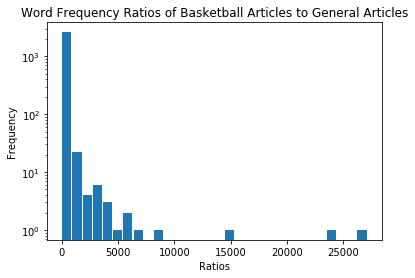

In [58]:
plt.hist(ratios, bins=30, rwidth=0.9, log=True)
plt.title("Word Frequency Ratios of Basketball Articles to General Articles")
plt.xlabel("Ratios")
plt.ylabel("Frequency")
plt.show()

In [60]:
import plotly
plotly.tools.set_credentials_file(username="amcire96", api_key="sej35ud4YbSOfIshhhZg")

import plotly.plotly as py
from plotly.graph_objs import *
import requests
requests.packages.urllib3.disable_warnings()

In [90]:
py.iplot(Data([Histogram(x=ratios, 
                         xbins=dict(
                            start=0,
                            end=1000,
                            size=5
                        ))]))

In [78]:
def get_sorted_over_threshold(threshold=100):
    over_threshold_ratio = {k:v for k,v in term_to_freq_ratio.items() if v >= threshold}
    over_threshold_ratio_sorted = sorted(over_threshold_ratio.items(), key=operator.itemgetter(1))
    return over_threshold_ratio_sorted

In [87]:
valid_words_to_ratio_t100 = get_sorted_over_threshold(threshold=100)

In [86]:
valid_words_to_ratio_t50 = get_sorted_over_threshold(threshold=50)

In [85]:
valid_words_to_ratio_t20 = get_sorted_over_threshold(threshold=20)

In [88]:
valid_words_to_ratio_t10 = get_sorted_over_threshold(threshold=10)
valid_words_to_ratio_t10

[(u'slick', 10.012009948161031),
 (u'bite', 10.013895963462236),
 (u'rookie', 10.055212273505697),
 (u'rounded', 10.064235547517336),
 (u'curse', 10.095093708111447),
 (u'faced', 10.112664362163034),
 (u'minded', 10.113621976355985),
 (u'cuts', 10.124617847218749),
 (u'blessing', 10.124762337366301),
 (u'recover', 10.147523488911776),
 (u'lazy', 10.151862480823674),
 (u'contend', 10.203732748892749),
 (u'adjusting', 10.226802446276364),
 (u'nations', 10.272454914748932),
 (u'hampers', 10.284938718667796),
 (u'overcome', 10.293373480034177),
 (u'coverage', 10.296494109542081),
 (u'heading', 10.30436451865144),
 (u'wants', 10.310687765002811),
 (u'shaun', 10.332092956575812),
 (u'coming', 10.348440331363827),
 (u'effectiveness', 10.356394992315723),
 (u'navigating', 10.363221416460036),
 (u'filling', 10.397638360047042),
 (u'predictable', 10.420359327418321),
 (u'aaron', 10.433845695927774),
 (u'disadvantage', 10.434318198690322),
 (u'capitalize', 10.448253280675372),
 (u'weak', 10.45901

In [91]:
valid_words_to_ratio_t5 = get_sorted_over_threshold(threshold=5)
valid_words_to_ratio_t5

[(u'blocked', 5.0279526615203123),
 (u'habits', 5.0405682104274376),
 (u'refine', 5.0440837957222362),
 (u'unfortunately', 5.0493665996214823),
 (u'shown', 5.057527478435917),
 (u'extraordinary', 5.0651264448866717),
 (u'desired', 5.0692776505601058),
 (u'backing', 5.0786202546255579),
 (u'look', 5.0824192897707938),
 (u'combines', 5.0893973625188771),
 (u'worst', 5.0915645279727793),
 (u'came', 5.0939174827748346),
 (u'weekend', 5.0954712307833532),
 (u'unlikely', 5.0981322910565225),
 (u'drawing', 5.0992761599393761),
 (u'quickly', 5.1003940465269073),
 (u'thoroughly', 5.1090383202728846),
 (u'usc', 5.1091936189672307),
 (u'figures', 5.113466665975416),
 (u'disappointed', 5.1180268813339351),
 (u'lower', 5.1290247322165419),
 (u'wisconsin', 5.1404247467247046),
 (u'constantly', 5.1445077083111368),
 (u'line', 5.1456169208332296),
 (u'hurt', 5.1557576681029147),
 (u'speed', 5.1784065339956662),
 (u'numbers', 5.1805584956480075),
 (u'elect', 5.1809761773505238),
 (u'driving', 5.1896931

In [94]:
valid_words = [word for word,_ in valid_words_to_ratio_t10]
valid_indices = [token_to_ind[word] for word in valid_words]
valid_indices

[2317,
 354,
 2139,
 2151,
 668,
 946,
 1611,
 671,
 360,
 2053,
 1437,
 598,
 174,
 1664,
 1186,
 1768,
 636,
 1206,
 2752,
 2251,
 537,
 826,
 1669,
 1005,
 1900,
 132,
 752,
 441,
 2762,
 141,
 142,
 579,
 2825,
 2597,
 2237,
 604,
 1259,
 2002,
 1515,
 2484,
 2388,
 672,
 801,
 1811,
 625,
 914,
 261,
 855,
 2701,
 2163,
 182,
 1883,
 2003,
 387,
 2227,
 1510,
 2261,
 707,
 1865,
 1812,
 1764,
 2431,
 2058,
 2625,
 1168,
 825,
 908,
 271,
 2184,
 1521,
 2015,
 2419,
 744,
 1846,
 927,
 1273,
 794,
 1086,
 1674,
 2420,
 1010,
 1821,
 289,
 648,
 1875,
 1966,
 1184,
 2554,
 1435,
 1963,
 1286,
 1986,
 178,
 1767,
 1323,
 470,
 1260,
 330,
 2126,
 894,
 1040,
 2323,
 1513,
 695,
 1639,
 1332,
 789,
 381,
 1337,
 923,
 2320,
 1869,
 1104,
 2065,
 389,
 2300,
 1638,
 2505,
 2618,
 2767,
 2764,
 542,
 2775,
 557,
 2325,
 2310,
 554,
 2050,
 1895,
 1937,
 1403,
 1054,
 1222,
 1647,
 1288,
 2336,
 279,
 2787,
 2012,
 2706,
 948,
 2082,
 2566,
 2495,
 730,
 2735,
 877,
 2106,
 205,
 658,
 7

In [95]:
print(prospects_tf.shape)

(100, 2830)


In [119]:
new_prospects_tf = prospects_tf[:, valid_indices]
new_prospects_tf_features = valid_words
print(new_prospects_tf.shape)

(100, 1045)


In [120]:
with open("prospects_tf.pkl", "w") as f:
    pickle.dump((new_prospects_tf, new_prospects_tf_features), f)

In [125]:
new_prospects_tfidf = prospects_tfidf[:, valid_indices]
new_prospects_tfidf_features = valid_words
print(new_prospects_tfidf.shape)


(100, 1045)


In [126]:
with open("prospects_tfidf.pkl", "w") as f:
    pickle.dump((new_prospects_tfidf, new_prospects_tfidf_features), f)